# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [18]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_request_data = requests.get(btc_url)
btc_data = btc_request_data.json()
btc_price_CAD = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
# YOUR CODE HERE!
eth_request_data = requests.get(eth_url)
eth_data = eth_request_data.json()
eth_price_CAD = eth_data['data']['1027']['quotes']['CAD']['price']


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price_CAD
my_eth_value = my_eth * eth_price_CAD

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51417.83
The current value of your 5.3 ETH is $14776.77


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [34]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [35]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [36]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp.today("America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_tickers = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Preview DataFrame
# YOUR CODE HERE!
df_tickers

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-06-21 00:00:00-04:00  109.88  110.0400  109.8800  109.980  1085301.0   
2017-06-22 00:00:00-04:00  110.06  110.0947  109.9500  110.050  1295361.0   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.9800  110.070  1101304.0   
2017-06-26 00:00:00-04:00  110.19  110.2400  110.1300  110.160  1364100.0   
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.830  2883305.0   
...                           ...       ...       ...      ...        ...   
2021-06-07 00:00:00-04:00  113.97  114.6400  113.9700  114.595  3639918.0   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820  3951702.0   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050  3418086.0   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665931.0   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3470062.0   

                              SPY                                       
                             open    high      low   close      volume  
time                                                                    
2017-06-21 00:00:00-04:00     NaN     NaN      NaN     NaN         NaN  
2017-06-22 00:00:00-04:00  242.97  243.53  242.640  242.83  32991335.0  
2017-06-23 00:00:00-04:00  242.91  243.51  242.470  243.16  45792641.0  
2017-06-26 00:00:00-04:00  243.89  244.38  243.045  243.27  43153677.0  
2017-06-27 00:00:00-04:00  243.04  243.38  241.310  241.36  60858189.0  
...                           ...     ...      ...     ...         ...  
2021-06-07 00:00:00-04:00  422.59  422.78  421.190  422.23  41442963.0  
2021-06-08 00:00:00-04:00  423.11  423.21  420.320  422.27  40131441.0  
2021-06-09 00:00:00-04:00  423.18  423.26  421.410  421.62  38368598.0  
2021-06-10 00:00:00-04:00  422.96  424.63  421.550  423.58  43574416.0  
2021-06-11 00:00:00-04:00  424.19  424.42  422.820  424.32  37014839.0  

[1001 rows x 10 columns]

In [37]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_tickers.iloc[-1]['AGG']['close']
spy_close_price = df_tickers.iloc[-1]['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.24
Current SPY closing price: $424.32


In [38]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21216.00
The current value of your 200 AGG shares is $23048.00


### Savings Health Analysis

In [40]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
savings_dict = {'crypto' : [my_btc_value + my_eth_value], 'shares' : [my_spy_value + my_agg_value]}

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame.from_dict(savings_dict, orient='index')
df_savings.columns = ['amount']
# Display savings DataFrame
display(df_savings)

,amount
crypto,66194.596736
shares,44264.000000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

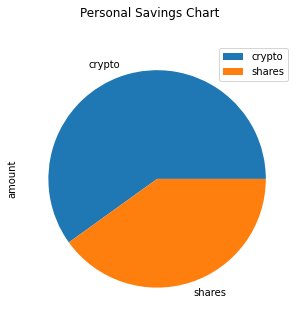

In [45]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind="pie", subplots=True, title="Personal Savings Chart", figsize=[8,5])

In [51]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.sum()

# Validate saving health
# YOUR CODE HERE!
if total_savings['amount'] > emergency_fund:
    print(f"Congratulations!! You have total savings of ${total_savings['amount']:.2f} which is more than enough for an emergency.")
elif total_savings['amount'] < emergency_fund:
    print(f"You have total savings of ${total_savings['amount']:.2f}. You still require ${emergency_fund - total_savings['amount']:.2f} more to have enough funds for an emergency.")
else:
    print(f"Congratulations!! You have enough funds for an emergency.")

Congratulations!! You have total savings of $110458.60 which is more than enough for an emergency.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [52]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [55]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [63]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_stock = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [64]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_stock.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [65]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987355,1.003689,0.988154,1.009498,1.002183,1.011351,1.003267,0.995390,1.015526,1.012440,...,1.004602,0.992739,1.000695,1.010007,1.000863,1.002982,1.016280,1.011539,0.988058,1.001788
2,0.975859,0.986324,0.976572,1.018750,0.995921,1.004543,1.010493,0.987180,1.016133,1.005714,...,0.998044,0.986202,0.997821,1.008080,0.992644,0.999618,1.012560,1.017604,0.988390,1.016931
3,0.985003,0.987402,0.975746,0.998547,0.997106,0.991931,1.017505,0.989964,1.012927,1.015823,...,0.984597,0.983926,0.990974,1.014358,1.017100,1.000945,1.014487,1.019070,0.988033,1.013243
4,0.979445,0.980521,0.961878,0.993481,0.984392,0.994300,1.023257,1.001612,1.008743,1.021503,...,0.984184,0.979868,1.003200,1.017625,1.022752,0.994803,1.006666,1.009178,0.993939,1.008936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.510198,32.555280,16.921040,45.827202,11.108678,17.582736,48.164880,15.344265,49.517317,30.820874,...,16.507192,50.887799,7.604689,20.196210,14.228773,8.329458,8.687322,24.186329,22.436216,12.065776
7557,6.531318,32.721066,16.895836,46.049915,11.098799,17.463247,48.397972,15.347773,49.446161,30.827834,...,16.450525,50.973590,7.555803,20.007458,14.322864,8.279065,8.771585,23.999762,22.675621,12.075609
7558,6.565798,33.110299,16.968366,45.654006,11.068273,17.293368,48.201704,15.294698,49.631113,31.060368,...,16.478856,50.638975,7.626816,20.090334,14.280677,8.235326,8.762769,23.805607,22.684296,11.962359
7559,6.613631,32.957590,17.008909,45.507387,11.039316,17.201353,48.692290,15.120192,50.099488,30.838332,...,16.196224,50.998774,7.594767,20.165323,14.419362,8.338356,8.686455,23.975992,22.709775,11.980552


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

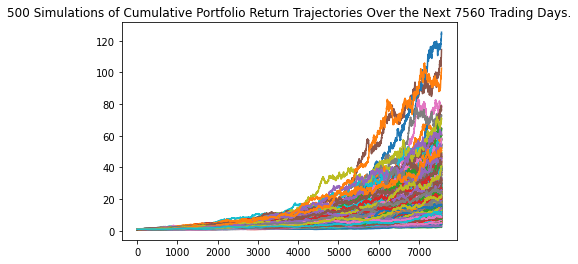

In [66]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_stock.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

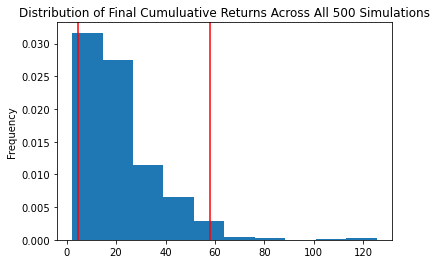

In [68]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_stock.plot_distribution()

### Retirement Analysis

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_stock_summary = MC_stock.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_stock_summary)

count           500.000000
mean             21.701396
std              15.748744
min               2.221035
25%              10.806760
50%              17.362051
75%              28.628235
max             125.371302
95% CI Lower      4.646755
95% CI Upper     58.174610
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [70]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(MC_stock_summary[8]*initial_investment,2)
ci_upper = round(MC_stock_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92935.1 and $1163492.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [71]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(MC_stock_summary[8]*initial_investment,2)
ci_upper = round(MC_stock_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $139402.65 and $1745238.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [72]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_stock_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [73]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_stock_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002033,1.005424,0.993995,1.007591,0.997313,1.011592,0.995574,1.003426,1.003888,0.996447,...,0.996252,0.998649,0.991016,0.998463,1.002416,0.996889,0.996968,1.003612,1.007821,1.002774
2,0.996341,0.999499,1.005491,1.000575,1.011106,1.006672,1.001258,1.001177,1.003836,1.005392,...,0.990007,1.010847,0.991412,1.011269,1.000221,0.994086,0.995699,1.001542,1.015301,0.997988
3,0.997918,1.013577,1.000694,0.999159,1.011320,1.000514,0.998963,1.017119,1.014157,1.005009,...,0.987700,1.014329,0.993146,1.020207,0.996429,0.990037,0.988492,0.997842,1.010708,1.006228
4,0.993307,1.004312,1.002914,1.011018,1.004142,0.993394,0.985713,1.033440,1.024890,1.004913,...,0.995634,1.029576,0.976807,1.020002,0.997182,0.996626,0.992647,0.999321,1.017978,1.001995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.885502,1.630616,1.456375,1.045951,1.248383,1.417910,1.180500,1.324621,2.428051,1.284652,...,1.149668,1.346116,2.520448,2.069928,2.261668,1.815055,2.275584,1.481449,1.216751,1.107142
1257,1.902728,1.639018,1.439442,1.047798,1.246262,1.419932,1.195345,1.297392,2.455518,1.271279,...,1.162124,1.316747,2.559057,2.089240,2.257759,1.800002,2.256331,1.487336,1.204941,1.106992
1258,1.897397,1.635678,1.432768,1.058320,1.225732,1.428380,1.199708,1.296247,2.474679,1.293588,...,1.168094,1.337761,2.542388,2.093400,2.273784,1.790494,2.258756,1.498303,1.211557,1.116187
1259,1.903114,1.656097,1.450667,1.062540,1.219252,1.432458,1.213045,1.286017,2.423353,1.306731,...,1.170782,1.344377,2.535871,2.110823,2.296641,1.785627,2.248823,1.488289,1.216667,1.120468


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

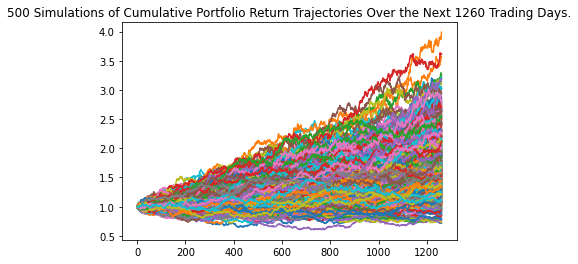

In [74]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_stock_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

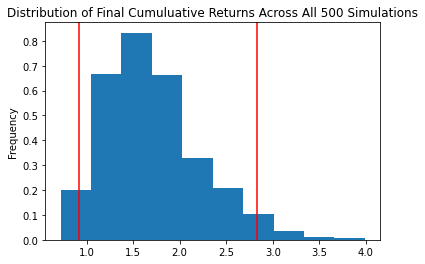

In [75]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_stock_5.plot_distribution()

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_stock_5_summary = MC_stock_5.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_stock_5_summary)

count           500.000000
mean              1.707113
std               0.523774
min               0.721064
25%               1.329645
50%               1.623704
75%               1.972380
max               3.988286
95% CI Lower      0.914710
95% CI Upper      2.832302
Name: 1260, dtype: float64


In [81]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 50000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(MC_stock_5_summary[8]*initial_investment,2)
ci_upper_five = round(MC_stock_5_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $45735.51 and $141615.11


### Ten Years Retirement Option

In [82]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_stock_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [83]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_stock_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998978,1.005201,0.995334,1.003308,0.988358,1.002210,1.001746,1.025966,1.006179,0.990151,...,1.012985,0.996417,1.001261,0.993523,1.002516,0.991896,1.018770,0.992906,0.995801,0.994595
2,1.019879,1.004748,0.993457,0.995174,0.980590,0.993200,0.992941,1.041215,1.020658,0.988466,...,1.005065,0.991127,0.994455,0.993268,1.001043,0.987196,1.025894,0.991412,0.984001,0.999641
3,1.012764,0.998058,1.000330,1.000802,0.996806,0.992621,0.979216,1.049696,1.019734,0.984127,...,0.986543,1.014511,0.990869,0.981952,1.001106,0.989333,1.008703,0.990113,0.983553,1.006575
4,1.020149,0.997457,1.000162,0.994804,0.992605,1.002794,0.976590,1.040758,1.022399,0.988277,...,0.990807,1.003306,0.993112,0.983234,0.994048,0.978910,1.007291,0.985812,0.980567,0.999708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.489005,1.731117,2.325159,3.110582,3.784061,4.419208,1.730742,3.232746,2.368613,1.890122,...,2.867185,3.453500,1.237763,1.781317,1.935005,5.036805,3.722591,1.614072,2.587353,2.490124
2517,2.541542,1.739511,2.315854,3.079975,3.785286,4.417215,1.725910,3.249756,2.351693,1.887867,...,2.870409,3.446432,1.241217,1.783595,1.942650,5.000350,3.682177,1.616496,2.569168,2.480477
2518,2.562938,1.706334,2.292464,3.065551,3.821233,4.438314,1.720976,3.279530,2.342877,1.900769,...,2.861362,3.445556,1.242485,1.796923,1.946513,4.995757,3.676125,1.612987,2.588776,2.494681
2519,2.558098,1.732196,2.329219,3.071390,3.835232,4.469437,1.753336,3.297058,2.351052,1.878712,...,2.845066,3.465707,1.225376,1.786133,1.963951,4.998716,3.711784,1.625461,2.549196,2.501560


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

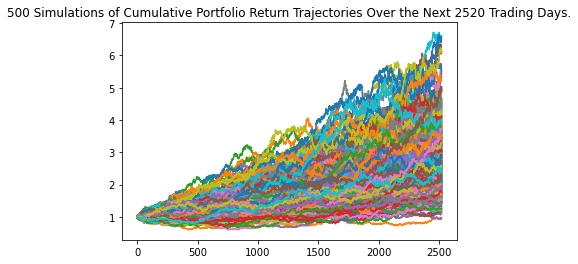

In [84]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_stock_10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

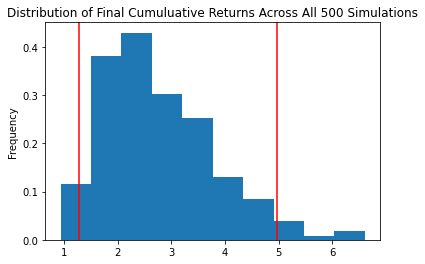

In [85]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_stock_10.plot_distribution()

In [86]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_stock_10_summary = MC_stock_10.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_stock_10_summary)

count           500.000000
mean              2.755974
std               1.014615
min               0.932155
25%               1.986165
50%               2.560066
75%               3.368397
max               6.607058
95% CI Lower      1.282240
95% CI Upper      4.976512
Name: 2520, dtype: float64


In [87]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(MC_stock_10_summary[8]*initial_investment,2)
ci_upper_ten = round(MC_stock_10_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $64112.02 and $248825.61
